# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [10]:
StudentID=[1,2,3,4,5,6,7,8,9,10]
print(len(StudentID))
Age=[17,51,27,21,36,48,19,26,54,30]
print(len(Age))
Tardies=[10,1,5,9,4,2,9,6,0,3]
len(Tardies)

10
10


10

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [15]:
# Your code here.
student_data = pd.DataFrame({'StudentID':StudentID,'Age': Age, 'Tardies': Tardies})
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

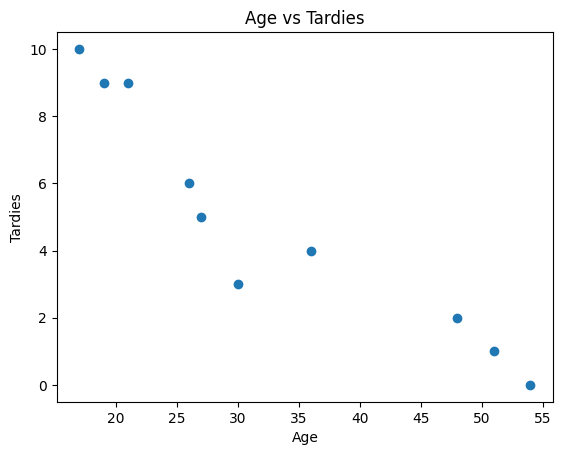

In [19]:
# Your code here.
x = student_data['Age']
y = student_data['Tardies']
plt.scatter(x,y)

plt.xlabel ('Age')
plt.ylabel('Tardies')
plt.title('Age vs Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
''' It is easy to observe that there is a pattern betweeen age and tardies. And the times that students arrive late are inversely proportional to their age'''

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

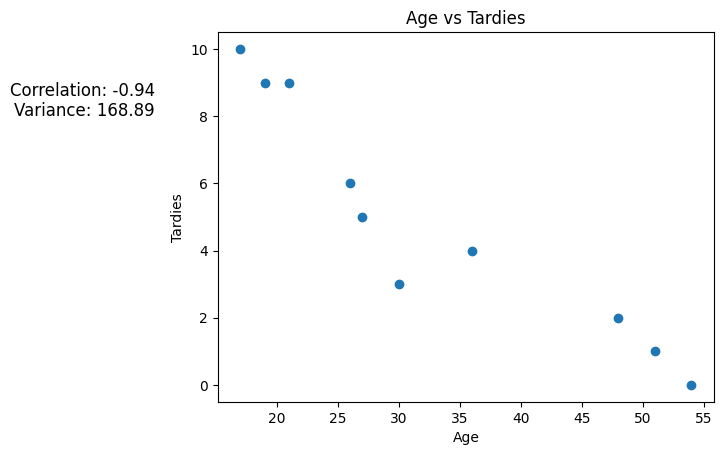

In [22]:
# Your response here.
#correlation:

correlation = np.corrcoef(Age, Tardies)[0, 1]

#covariance:
variance = np.var(Age)


text = f'Correlation: {correlation:.2f}\nVariance: {variance:.2f}'
plt.text(10, 8, text, fontsize=12, ha='right')
x = student_data['Age']
y = student_data['Tardies']
plt.scatter(x,y)

plt.xlabel ('Age')
plt.ylabel('Tardies')
plt.title('Age vs Tardies')
plt.show()

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [35]:
# Your response here.
#The outcome variable will be the Tardies. And I am using linear regression
x = np.array(student_data['Age']).reshape(-1, 1)
y = np.array(student_data['Tardies'])
model = linear_model.LinearRegression()
result = model.fit(x,y)
regression_line = result.intercept_ + result.coef_[0]*x
print('b : ',result.intercept_ )
print('m : ',result.coef_[0])

b :  12.888803363135771
m :  -0.2428207709159809


Plot your regression model on your scatter plot.

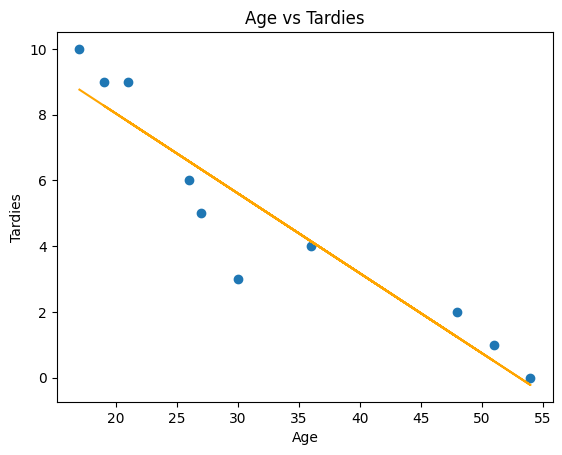

In [32]:
# Your code here.
plt.plot(x, regression_line, c = 'orange')
plt.title('Age vs Tardies')
plt.xlabel ('Age')
plt.ylabel('Tardies')
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [36]:
# Your response here. 
#Following the description of the ploted line y=mx +b. I have checked that I was right about the inversely proportion. 
#This is because the slope --> m = -0,24  < 0. Although in the plot the m looks like farther from 0 than 0,24 it is because the scale of x and y are not the same.
#Regarding the b parámeter, it is  b=12,89 --> that means the point of interceptcion between the plotted line and the y axe is in the the point (0,12.88)

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [37]:
# Import any libraries you may need & the data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [60]:
# Your response here. 
df=pd.read_csv('vehicles.csv')
display(df.shape)
df.head()

(35952, 15)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [61]:
# Your response here. 
#I will use Multilinear regression. Because we have several x and one y which is de CO2 emission.
X = df[['Year','Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = df['CO2 Emission Grams/Mile']
model = linear_model.LinearRegression()
result = model.fit(X,y)
print(result.score(X,y))
#Create a correlation matrix to find the varriable with the highest correlation de the target but the lowet correlation between themselves.
cols=['Year','Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']
corr_matrix = df.loc[:,cols].corr()
corr_matrix


0.9808734920269122


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [62]:
# Your response here. 
X = df[['Cylinders','Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = df['CO2 Emission Grams/Mile']
model = linear_model.LinearRegression()
result = model.fit(X,y)
print(result.score(X,y))

'''
We can see here some points. All the columns (x) has a high correlation with the target, except the Year column. 
However we can also realize that  they are also very correlated between them and that do not give us a lot of information.
That make sense because for example: the more barrels it need the higher will be the cost.
keeping this in mind. We could use a simple linear regression with the column Fuel Barrels/Year. Because the result will not change 

'''


0.9802919387898396


'\nWe can see here some points. All the columns (x) has a high correlation with the target, except the Year column. \nHowever we can also realize that  they are also very correlated between them and that do not give us a lot of information.\nThat make sense because for example: the more barrels it need the higher will be the cost.\nkeeping this in mind. We could use a simple linear regression with the column Fuel Barrels/Year. Because the result will not change \n\n'

In [64]:
x = df['Fuel Barrels/Year']
y = df['CO2 Emission Grams/Mile']
model = linear_model.LinearRegression()
result = model.fit(x,y)
print(result.score(x,y))

ValueError: Expected 2D array, got 1D array instead:
array=[19.38882353 25.35461538 20.600625   ...  9.15583333  9.15583333
  9.41742857].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [66]:
# Your code here.

data = {
    'X': [1, 3, 4, 6, 8, 9, 11, 14],
    'Y': [1, 2, 4, 4, 5, 7, 8, 13]
}
new_df = pd.DataFrame(data)
new_df 

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


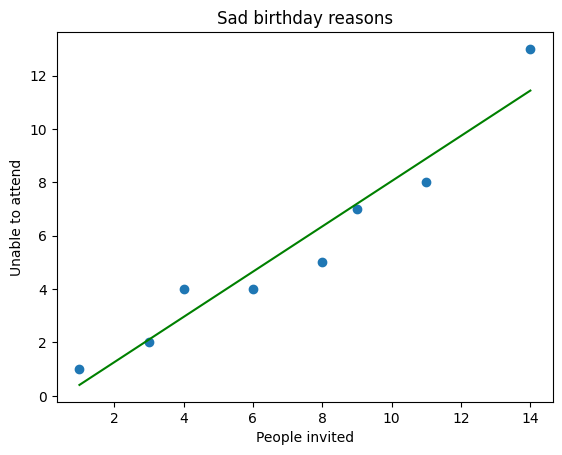

In [69]:
x = np.array(new_df['X']).reshape(-1, 1)
y = np.array(new_df['Y'])
plt.scatter(x,y)

model = linear_model.LinearRegression()
result = model.fit(x,y)
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'green')
plt.xlabel ('People invited')
plt.ylabel('Unable to attend')
plt.title('Sad birthday reasons')
plt.show()

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

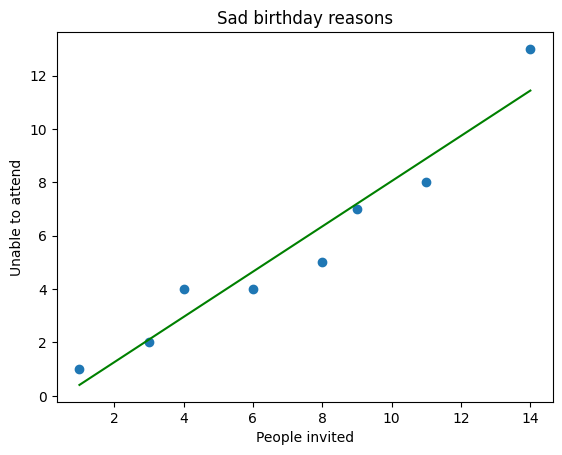

In [70]:
x = np.array(new_df['X']).reshape(-1, 1)
y = np.array(new_df['Y'])
plt.scatter(x,y)

model = linear_model.LinearRegression()
result = model.fit(x,y)
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'green')
plt.xlabel ('People invited')
plt.ylabel('Unable to attend')
plt.title('Sad birthday reasons')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [75]:
# Your response here. 
print('b : ',result.intercept_)
print('slope : ',result.coef_[0])
print('\n')
model = linear_model.LinearRegression()
result = model.fit(x,y)
print('corr : ',result.score(x,y))

b :  -0.43939393939393945
slope :  0.8484848484848485


corr :  0.9316696375519905


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [78]:
# Your response here. 
import numpy as np
Y= np.array(new_df['Y'])
predictions = [result.intercept_ + result.coef_[0]*x for x in X]
residuals = [Y[i] - predictions[i] for i in range(len(Y))]
RMSE = np.sqrt(np.mean([residual**2 for residual in residuals]))
RMSE

12.420183616880461

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
Y= np.array(new_df['Y'])
predictions = [result.intercept_ + result.coef_[0]*x for x in X]
print(mean_squared_error(Y, predictions))
r2_score(Y, predictions)

ValueError: Found input variables with inconsistent numbers of samples: [8, 35952]

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
#I don´t know what to do here